In [1]:
from skimage.measure import find_contours
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

orig_img = imread('resources/stars.jpg')
gray_img = rgb2gray(orig_img)

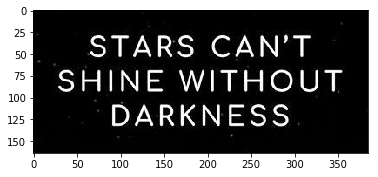

In [2]:
contours = find_contours(gray_img, 0.8)

fig, ax = plt.subplots()
ax.imshow(gray_img, interpolation='nearest', cmap=plt.cm.gray)

#for n, contour in enumerate(contours):
# ax.plot(contours[0][:, 1], contours[0][:, 0], linewidth=2)

plt.show()

In [3]:
print len(contours)

37


In [4]:
import numpy as np

bounding_boxes = []

for contour in contours:
    Xmin = np.min(contour[:,0])
    Xmax = np.max(contour[:,0])
    Ymin = np.min(contour[:,1])
    Ymax = np.max(contour[:,1])
    
    bounding_boxes.append([Xmin, Xmax, Ymin, Ymax])

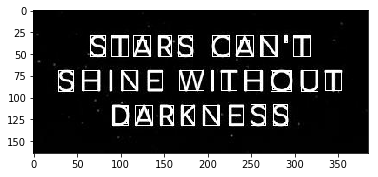

In [18]:
from skimage.draw import polygon, rectangle, polygon_perimeter

# for box in bounding_boxes:
#     #Row coordinates of vertices of polygon.
#     #[Xmin, Xmax, Ymin, Ymax]
#     r = [box[0],box[1],box[0],box[1]]
#     c = [box[3],box[3],box[2],box[2]]
#     rr, cc = polygon(r,c)
#     gray_img[rr, cc] = 1
with_boxes  = np.copy(gray_img)

for box in bounding_boxes:
    #Row coordinates of vertices of polygon.
    #[Xmin, Xmax, Ymin, Ymax]
    r = [box[0],box[1],box[1],box[0], box[0]]
    c = [box[3],box[3],box[2],box[2], box[3]]
    rr, cc = polygon_perimeter(r, c, with_boxes.shape)

    with_boxes[rr, cc] = 1

plt.imshow(with_boxes, interpolation='nearest', cmap=plt.cm.gray)
plt.show()

In [44]:
from skimage.io import imsave

#extract the individual letters from the contours.
cut_boxes  = np.copy(gray_img)
box = bounding_boxes[0]
#[Xmin, Xmax, Ymin, Ymax]
objects = []
for box in bounding_boxes:
    objects.append(cut_boxes[int(box[2]):int(box[3]), int(box[0]):int(box[1])])

#print len(objects)
index = 0
for obj  in objects:
    imsave(str(index)+".jpg", obj)
# plt.imshow(cropped, interpolation='nearest', cmap=plt.cm.gray)

# plt.show()

/home/muthu/.local/lib/python2.7/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


IndexError: cannot do a non-empty take from an empty axes.